In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
#IMPORTS
import os
import pandas as pd
import os

In [3]:
loc = 'nw2'
turbine = 'c02'

In [4]:
# GET THE DATA
package_folder = os.path.dirname(os.path.dirname(os.getcwd()))
data_folder = os.path.join(package_folder, 'data')
ss2_selected = pd.read_csv(os.path.join(data_folder, 'processed','nw2', turbine+'_ss2_selected_data_large.csv'))
SS1_dbscan = pd.read_parquet(os.path.join(data_folder, 'interim',loc,'tracked_modes', 'dbscan_based', loc+turbine+'_SS1_mode.parquet'))
SS2_dbscan = pd.read_parquet(os.path.join(data_folder, 'interim',loc,'tracked_modes', 'dbscan_based', loc+turbine+'_SS2_mode.parquet'))
FA1_dbscan = pd.read_parquet(os.path.join(data_folder, 'interim',loc,'tracked_modes', 'dbscan_based', loc+turbine+'_FA1_mode.parquet'))
FA2_dbscan = pd.read_parquet(os.path.join(data_folder, 'interim',loc,'tracked_modes', 'dbscan_based', loc+turbine+'_FA2_mode.parquet'))

In [5]:
SS1_dbscan

,size,algorithm,std_damping,mean_damping,std_frequency,mean_frequency,labels
timestamp,,,,,,,
2022-10-01 00:10:00+00:00,34,lscf,0.412125,4.564558,0.001464,0.223408,3
2022-10-01 00:40:00+00:00,39,lscf,0.618176,3.598217,0.000421,0.218742,3
2022-10-01 00:50:00+00:00,39,lscf,0.443049,4.820839,0.001741,0.219694,3
2022-10-01 01:10:00+00:00,40,lscf,0.890306,2.635769,0.002914,0.220064,3
2022-10-01 01:20:00+00:00,41,lscf,0.130404,2.287142,0.000433,0.220180,3
...,...,...,...,...,...,...,...
2023-12-31 23:20:00+00:00,33,lscf,0.789763,3.482438,0.001809,0.221558,3
2023-12-31 23:30:00+00:00,36,lscf,0.263275,4.567449,0.000296,0.223863,3
2023-12-31 23:40:00+00:00,35,lscf,0.295131,3.826105,0.000376,0.224716,3


In [6]:
from src.data.utils import get_input_data
from src.data.harmonics import *

data = {}
data['turbine_data'] = pd.read_parquet(os.path.join(data_folder, 'raw', loc, 'big_data', loc + turbine + '_big_data.parquet'))
data['mvbc_data'] = pd.read_parquet(os.path.join(data_folder, 'external', loc, 'mvbc_data.parquet'))

harmonics_data = harmonics(data['turbine_data'].filter(regex='rpm'), [1,3,6, 9])

wandelaar_weather_station_data = pd.read_parquet(os.path.join(data_folder,'external', loc, 'test_wandelaar_weather_data.parquet'))
westhinder_weather_station_data = pd.read_parquet(os.path.join(data_folder,'external', loc, 'test_westhinder_weather_data.parquet'))

mvbc_test_data = wandelaar_weather_station_data.copy()
mvbc_test_data[mvbc_test_data.filter(regex='Tide').columns] = westhinder_weather_station_data.filter(regex='Tide').values
#mvbc_test_data.rename(columns={mvbc_test_data.filter(regex='Tide').columns[0] :westhinder_weather_station_data.filter(regex='Tide').columns[0]}, inplace=True)
mvbc_test_data.isna().sum()
mvbc_test_data.index = pd.to_datetime(mvbc_test_data.index, utc=True)

In [7]:
scada_data = data['turbine_data'].filter(regex='mean_').filter(regex='rpm|yaw|pitch|power|windspeed|winddirection')
1 - scada_data.isna().sum()/len(scada_data)

mean_NW2_C02_rpm              0.97398
mean_NW2_C02_yaw              0.97398
mean_NW2_C02_pitch            0.97398
mean_NW2_C02_power            0.97398
mean_NW2_C02_windspeed        0.97398
mean_NW2_C02_winddirection    0.97398
dtype: float64

In [8]:
mvbc_data = pd.concat([data['mvbc_data'], mvbc_test_data], axis=0)
mvbc_data = mvbc_data[~mvbc_data.index.duplicated(keep='first')]
1 - mvbc_data.isna().sum()/len(mvbc_data)

mvbc_WandelaarBuoy_10%_highest_waves                                    1.000000
mvbc_WandelaarBuoy_Wave_height                                          1.000000
mvbc_WandelaarBuoy_Average_wave_period                                  1.000000
mvbc_WandelaarBuoy_Height_waves_with_period_>_10_s                      1.000000
mvbc_WandelaarBuoy_Sea_water_temperature                                0.941740
mvbc_WandelaarMeasuringpile_Max_3-seconds_wind_gust_(at_10_m_height)    0.999970
mvbc_WandelaarMeasuringpile_Average_wind_direction                      1.000000
mvbc_WandelaarMeasuringpile_Average_wind_speed_(at_10_m_height)         0.999970
mvbc_WandelaarMeasuringpile_Tide_TAW                                    0.989682
mvbc_WandelaarMeasuringpile_Relative_humidity                           0.798629
mvbc_WandelaarMeasuringpile_Air_pressure                                0.999605
mvbc_WandelaarMeasuringpile_Air_temperature                             1.000000
mvbc_WandelaarBuoy_1%_wave_h

In [9]:
from sklearn.model_selection import train_test_split
X_ = pd.concat([mvbc_data, scada_data], axis=1)
#only keep columns of X with 90% or more non-nan values
X_ = X_.loc[:, X_.isna().sum()/len(X_) < 0.1]

y_ = SS2_dbscan['mean_frequency']
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
X_

,mvbc_WandelaarBuoy_10%_highest_waves,mvbc_WandelaarBuoy_Wave_height,mvbc_WandelaarBuoy_Average_wave_period,mvbc_WandelaarBuoy_Height_waves_with_period_>_10_s,mvbc_WandelaarBuoy_Sea_water_temperature,mvbc_WandelaarMeasuringpile_Max_3-seconds_wind_gust_(at_10_m_height),mvbc_WandelaarMeasuringpile_Average_wind_direction,mvbc_WandelaarMeasuringpile_Average_wind_speed_(at_10_m_height),mvbc_WandelaarMeasuringpile_Tide_TAW,mvbc_WandelaarMeasuringpile_Air_pressure,mvbc_WandelaarMeasuringpile_Air_temperature,mean_NW2_C02_rpm,mean_NW2_C02_yaw,mean_NW2_C02_pitch,mean_NW2_C02_power,mean_NW2_C02_windspeed,mean_NW2_C02_winddirection
2022-10-01 00:00:00+00:00,173.000000,135.000000,4.270000,7.000000,NaN,18.400000,198.000000,15.300000,99.000000,998.000000,12.700000,NaN,NaN,NaN,NaN,NaN,NaN
2022-10-01 00:10:00+00:00,173.000000,135.333333,4.243333,7.333333,NaN,18.600000,198.666667,15.466667,117.333333,997.866667,12.733333,10.445,184.505,13.345,9525.121,19.578,184.449
2022-10-01 00:20:00+00:00,173.000000,135.666667,4.216667,7.666667,NaN,18.800000,199.333333,15.633333,135.666667,997.733333,12.766667,10.445,184.533,14.352,9524.993,21.063,186.687
2022-10-01 00:30:00+00:00,173.000000,136.000000,4.190000,8.000000,NaN,19.000000,200.000000,15.800000,154.000000,997.600000,12.800000,10.445,184.533,13.848,9525.056,20.809,186.127
2022-10-01 00:40:00+00:00,178.666667,140.333333,4.163333,8.000000,NaN,18.833333,202.666667,15.833333,183.000000,997.533333,12.800000,10.445,187.218,9.372,9524.672,17.090,187.862
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-31 23:20:00+00:00,226.666667,178.000000,4.730000,14.666667,9.8,17.466667,216.666667,14.433333,223.666667,994.100000,8.333333,10.445,219.307,11.219,9524.800,17.965,219.503
2023-12-31 23:30:00+00:00,232.000000,182.000000,4.730000,15.000000,9.8,17.300000,218.000000,14.200000,236.000000,994.200000,8.400000,10.445,224.399,12.505,9524.928,18.660,224.119
2023-12-31 23:40:00+00:00,229.666667,180.333333,4.703333,14.666667,9.8,17.833333,229.666667,14.600000,250.333333,994.266667,9.033333,10.445,226.553,11.414,9525.056,17.832,225.798
2023-12-31 23:50:00+00:00,227.333333,178.666667,4.676667,14.333333,9.8,18.366667,241.333333,15.000000,264.666667,994.333333,9.666667,10.445,222.441,10.323,9524.096,17.176,221.797


In [41]:
Xy = pd.DataFrame(y_)
for col in X_.columns:
    Xy[col] = X_[col]
Xy = Xy.dropna()
y = Xy[y_.name]
X = Xy[X_.columns]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
from xgboost import XGBRegressor
from sklearn.feature_selection import RFE
regr_model = XGBRegressor()
selector = RFE(regr_model, n_features_to_select=13)  # Adjust the number of features
selector = selector.fit(X, y)

selected_features = selector.support_
ranking = selector.ranking_

print("Selected features:", selected_features)
print("Feature ranking:", ranking)

Selected features: [ True  True  True False  True False False False  True  True  True  True
  True  True  True  True  True]
Feature ranking: [1 1 1 5 1 4 3 2 1 1 1 1 1 1 1 1 1]


In [43]:
y_unique = y[~y.index.duplicated(keep='first')]
print(len(y_unique))
print('Availability: ', len(y_unique)/len(X_))

54675
Availability:  0.8308134145785531


In [44]:
from sklearn.model_selection import train_test_split
X_ = pd.concat([mvbc_data, scada_data], axis=1)
#only keep columns of X with 90% or more non-nan values
X_ = X_.loc[:, X_.isna().sum()/len(X_) < 0.1]

y_ = SS2_dbscan['mean_frequency']
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Xy = pd.DataFrame(y_)
for col in X_.columns:
    Xy[col] = X_[col]
Xy = Xy.dropna()
y = Xy[y_.name]
X = Xy[X_.columns]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

y_unique = y_[~y_.index.duplicated(keep='first')].dropna()
print('Availability: ', len(y_unique)/len(X_))

from xgboost import XGBRegressor
from sklearn.feature_selection import RFE
regr_model = XGBRegressor()
selector = RFE(regr_model, n_features_to_select=1)  # Adjust the number of features
selector = selector.fit(X, y)

selected_features = selector.support_
ranking = selector.ranking_

print("Selected features:", X.columns[selected_features])
print("Removed features: ", X.columns[~selected_features])
print("Feature ranking:", ranking)
print('ordered features: ', X.columns[ranking.argsort()])



Availability:  0.9184458052849914
Selected features: Index(['mean_NW2_C02_power'], dtype='object')
Removed features:  Index(['mvbc_WandelaarBuoy_10%_highest_waves',
       'mvbc_WandelaarBuoy_Wave_height',
       'mvbc_WandelaarBuoy_Average_wave_period',
       'mvbc_WandelaarBuoy_Height_waves_with_period_>_10_s',
       'mvbc_WandelaarBuoy_Sea_water_temperature',
       'mvbc_WandelaarMeasuringpile_Max_3-seconds_wind_gust_(at_10_m_height)',
       'mvbc_WandelaarMeasuringpile_Average_wind_direction',
       'mvbc_WandelaarMeasuringpile_Average_wind_speed_(at_10_m_height)',
       'mvbc_WandelaarMeasuringpile_Tide_TAW',
       'mvbc_WandelaarMeasuringpile_Air_pressure',
       'mvbc_WandelaarMeasuringpile_Air_temperature', 'mean_NW2_C02_rpm',
       'mean_NW2_C02_yaw', 'mean_NW2_C02_pitch', 'mean_NW2_C02_windspeed',
       'mean_NW2_C02_winddirection'],
      dtype='object')
Feature ranking: [ 7  6 13 17 11 16 15 14  2 12  9  3 10  5  1  4  8]
ordered features:  Index(['mean_NW2_C02_po

In [45]:
from sklearn.model_selection import train_test_split
X_ = pd.concat([mvbc_data, scada_data], axis=1)
#only keep columns of X with 90% or more non-nan values
X_ = X_.loc[:, X_.isna().sum()/len(X_) < 0.1]

y_ = SS1_dbscan['mean_frequency']
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Xy = pd.DataFrame(y_)
for col in X_.columns:
    Xy[col] = X_[col]
Xy = Xy.dropna()
y = Xy[y_.name]
X = Xy[X_.columns]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

y_unique = y_[~y_.index.duplicated(keep='first')].dropna()
print('Availability: ', len(y_unique)/len(X_))

from xgboost import XGBRegressor
from sklearn.feature_selection import RFE
regr_model = XGBRegressor()
selector = RFE(regr_model, n_features_to_select=12)  # Adjust the number of features
selector = selector.fit(X, y)

selected_features = selector.support_
ranking = selector.ranking_

print("Selected features:", X.columns[selected_features])
print("Removed features: ", X.columns[~selected_features])
print("Feature ranking:", ranking)
print('ordered features: ', X.columns[ranking.argsort()])

Availability:  0.8653527632998526
Selected features: Index(['mvbc_WandelaarBuoy_10%_highest_waves',
       'mvbc_WandelaarBuoy_Wave_height',
       'mvbc_WandelaarBuoy_Average_wave_period',
       'mvbc_WandelaarBuoy_Sea_water_temperature',
       'mvbc_WandelaarMeasuringpile_Air_pressure',
       'mvbc_WandelaarMeasuringpile_Air_temperature', 'mean_NW2_C02_rpm',
       'mean_NW2_C02_yaw', 'mean_NW2_C02_pitch', 'mean_NW2_C02_power',
       'mean_NW2_C02_windspeed', 'mean_NW2_C02_winddirection'],
      dtype='object')
Removed features:  Index(['mvbc_WandelaarBuoy_Height_waves_with_period_>_10_s',
       'mvbc_WandelaarMeasuringpile_Max_3-seconds_wind_gust_(at_10_m_height)',
       'mvbc_WandelaarMeasuringpile_Average_wind_direction',
       'mvbc_WandelaarMeasuringpile_Average_wind_speed_(at_10_m_height)',
       'mvbc_WandelaarMeasuringpile_Tide_TAW'],
      dtype='object')
Feature ranking: [1 1 1 3 1 6 4 5 2 1 1 1 1 1 1 1 1]
ordered features:  Index(['mvbc_WandelaarBuoy_10%_highest_wa

In [46]:
from sklearn.model_selection import train_test_split
X_ = pd.concat([mvbc_data, scada_data], axis=1)
#only keep columns of X with 90% or more non-nan values
X_ = X_.loc[:, X_.isna().sum()/len(X_) < 0.1]

y_ = SS1_dbscan['mean_frequency']
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Xy = pd.DataFrame(y_)
for col in X_.columns:
    Xy[col] = X_[col]
Xy = Xy.dropna()
y = Xy[y_.name]
X = Xy[X_.columns]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

y_unique = y_[~y_.index.duplicated(keep='first')].dropna()
print('Availability: ', len(y_unique)/len(X_))

from xgboost import XGBRegressor
from sklearn.feature_selection import RFE
regr_model = XGBRegressor()
selector = RFE(regr_model, n_features_to_select=12)  # Adjust the number of features
selector = selector.fit(X, y)

selected_features = selector.support_
ranking = selector.ranking_

print("Selected features:", X.columns[selected_features])
print("Removed features: ", X.columns[~selected_features])
print("Feature ranking:", ranking)
print('ordered features: ', X.columns[ranking.argsort()])

selected_data = X_[X.columns[selected_features]]
selected_data.to_parquet(os.path.join(data_folder, 'interim', loc, 'rfe_selected_data', loc+turbine+'_rfe_selected_data.parquet'))

Availability:  0.8653527632998526
Selected features: Index(['mvbc_WandelaarBuoy_10%_highest_waves',
       'mvbc_WandelaarBuoy_Wave_height',
       'mvbc_WandelaarBuoy_Average_wave_period',
       'mvbc_WandelaarBuoy_Sea_water_temperature',
       'mvbc_WandelaarMeasuringpile_Air_pressure',
       'mvbc_WandelaarMeasuringpile_Air_temperature', 'mean_NW2_C02_rpm',
       'mean_NW2_C02_yaw', 'mean_NW2_C02_pitch', 'mean_NW2_C02_power',
       'mean_NW2_C02_windspeed', 'mean_NW2_C02_winddirection'],
      dtype='object')
Removed features:  Index(['mvbc_WandelaarBuoy_Height_waves_with_period_>_10_s',
       'mvbc_WandelaarMeasuringpile_Max_3-seconds_wind_gust_(at_10_m_height)',
       'mvbc_WandelaarMeasuringpile_Average_wind_direction',
       'mvbc_WandelaarMeasuringpile_Average_wind_speed_(at_10_m_height)',
       'mvbc_WandelaarMeasuringpile_Tide_TAW'],
      dtype='object')
Feature ranking: [1 1 1 3 1 6 4 5 2 1 1 1 1 1 1 1 1]
ordered features:  Index(['mvbc_WandelaarBuoy_10%_highest_wa

In [47]:
from sklearn.model_selection import train_test_split
X_ = pd.concat([mvbc_data, scada_data], axis=1)
#only keep columns of X with 90% or more non-nan values
X_ = X_.loc[:, X_.isna().sum()/len(X_) < 0.1]

y_ = SS1_dbscan['mean_frequency']
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Xy = pd.DataFrame(y_)
for col in X_.columns:
    Xy[col] = X_[col]
Xy = Xy.dropna()
y = Xy[y_.name]
X = Xy[X_.columns]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

y_unique = y_[~y_.index.duplicated(keep='first')].dropna()
print('Availability: ', len(y_unique)/len(X_))

from xgboost import XGBRegressor
from sklearn.feature_selection import RFE
regr_model = XGBRegressor()
selector = RFE(regr_model, n_features_to_select=12)  # Adjust the number of features
selector = selector.fit(X, y)

selected_features = selector.support_
ranking = selector.ranking_

print("Selected features:", X.columns[selected_features])
print("Removed features: ", X.columns[~selected_features])
print("Feature ranking:", ranking)
print('ordered features: ', X.columns[ranking.argsort()])

selected_data = X_[X.columns[selected_features]]
selected_data.to_parquet(os.path.join(data_folder, 'interim', loc, 'rfe_selected_data', loc+turbine+'_rfe_selected_data.parquet'))

Availability:  0.8653527632998526
Selected features: Index(['mvbc_WandelaarBuoy_10%_highest_waves',
       'mvbc_WandelaarBuoy_Wave_height',
       'mvbc_WandelaarBuoy_Average_wave_period',
       'mvbc_WandelaarBuoy_Sea_water_temperature',
       'mvbc_WandelaarMeasuringpile_Air_pressure',
       'mvbc_WandelaarMeasuringpile_Air_temperature', 'mean_NW2_C02_rpm',
       'mean_NW2_C02_yaw', 'mean_NW2_C02_pitch', 'mean_NW2_C02_power',
       'mean_NW2_C02_windspeed', 'mean_NW2_C02_winddirection'],
      dtype='object')
Removed features:  Index(['mvbc_WandelaarBuoy_Height_waves_with_period_>_10_s',
       'mvbc_WandelaarMeasuringpile_Max_3-seconds_wind_gust_(at_10_m_height)',
       'mvbc_WandelaarMeasuringpile_Average_wind_direction',
       'mvbc_WandelaarMeasuringpile_Average_wind_speed_(at_10_m_height)',
       'mvbc_WandelaarMeasuringpile_Tide_TAW'],
      dtype='object')
Feature ranking: [1 1 1 3 1 6 4 5 2 1 1 1 1 1 1 1 1]
ordered features:  Index(['mvbc_WandelaarBuoy_10%_highest_wa

In [48]:
from sklearn.model_selection import train_test_split
X_ = pd.concat([mvbc_data, scada_data], axis=1)
#only keep columns of X with 90% or more non-nan values
X_ = X_.loc[:, X_.isna().sum()/len(X_) < 0.1]

y_ = SS2_dbscan['mean_frequency']
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Xy = pd.DataFrame(y_)
for col in X_.columns:
    Xy[col] = X_[col]
Xy = Xy.dropna()
y = Xy[y_.name]
X = Xy[X_.columns]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

y_unique = y_[~y_.index.duplicated(keep='first')].dropna()
low_rpm_indices = X[X[X.filter(regex='rpm').columns[0]] <= 0].index
common_indices = y_unique.index.intersection(low_rpm_indices)
print('Availability: ', len(common_indices)/len(X_))

from xgboost import XGBRegressor
from sklearn.feature_selection import RFE
regr_model = XGBRegressor()
selector = RFE(regr_model, n_features_to_select=13)  # Adjust the number of features
selector = selector.fit(X, y)

selected_features = selector.support_
ranking = selector.ranking_

print("Selected features:", X.columns[selected_features])
print("Removed features: ", X.columns[~selected_features])
print("Feature ranking:", ranking)
print('ordered features: ', X.columns[ranking.argsort()])

Availability:  0.03789755200656445
Selected features: Index(['mvbc_WandelaarBuoy_10%_highest_waves',
       'mvbc_WandelaarBuoy_Wave_height',
       'mvbc_WandelaarBuoy_Average_wave_period',
       'mvbc_WandelaarBuoy_Sea_water_temperature',
       'mvbc_WandelaarMeasuringpile_Tide_TAW',
       'mvbc_WandelaarMeasuringpile_Air_pressure',
       'mvbc_WandelaarMeasuringpile_Air_temperature', 'mean_NW2_C02_rpm',
       'mean_NW2_C02_yaw', 'mean_NW2_C02_pitch', 'mean_NW2_C02_power',
       'mean_NW2_C02_windspeed', 'mean_NW2_C02_winddirection'],
      dtype='object')
Removed features:  Index(['mvbc_WandelaarBuoy_Height_waves_with_period_>_10_s',
       'mvbc_WandelaarMeasuringpile_Max_3-seconds_wind_gust_(at_10_m_height)',
       'mvbc_WandelaarMeasuringpile_Average_wind_direction',
       'mvbc_WandelaarMeasuringpile_Average_wind_speed_(at_10_m_height)'],
      dtype='object')
Feature ranking: [1 1 1 5 1 4 3 2 1 1 1 1 1 1 1 1 1]
ordered features:  Index(['mvbc_WandelaarBuoy_10%_highest_w

In [49]:
from sklearn.model_selection import train_test_split
X_ = pd.concat([mvbc_data, scada_data], axis=1)
#only keep columns of X with 90% or more non-nan values
X_ = X_.loc[:, X_.isna().sum()/len(X_) < 0.1]

y_ = FA1_dbscan['mean_frequency']
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Xy = pd.DataFrame(y_)
for col in X_.columns:
    Xy[col] = X_[col]
Xy = Xy.dropna()
y = Xy[y_.name]
X = Xy[X_.columns]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

y_unique = y_[~y_.index.duplicated(keep='first')].dropna()
print('Availability: ', len(y_unique)/len(X_))

from xgboost import XGBRegressor
from sklearn.feature_selection import RFE
regr_model = XGBRegressor()
selector = RFE(regr_model, n_features_to_select=5)  # Adjust the number of features
selector = selector.fit(X, y)

selected_features = selector.support_
ranking = selector.ranking_

print("Selected features:", selected_features)
print("Feature ranking:", ranking)
print('ordered features: ', X.columns[ranking.argsort()])

Availability:  0.39233235575681136
Selected features: [False False False False False False False False False False False  True
  True  True False  True  True]
Feature ranking: [13 12  9 11  8  7 10  6  5  4  2  1  1  1  3  1  1]
ordered features:  Index(['mean_NW2_C02_winddirection', 'mean_NW2_C02_pitch', 'mean_NW2_C02_yaw',
       'mean_NW2_C02_rpm', 'mean_NW2_C02_windspeed',
       'mvbc_WandelaarMeasuringpile_Air_temperature', 'mean_NW2_C02_power',
       'mvbc_WandelaarMeasuringpile_Air_pressure',
       'mvbc_WandelaarMeasuringpile_Tide_TAW',
       'mvbc_WandelaarMeasuringpile_Average_wind_speed_(at_10_m_height)',
       'mvbc_WandelaarMeasuringpile_Max_3-seconds_wind_gust_(at_10_m_height)',
       'mvbc_WandelaarBuoy_Sea_water_temperature',
       'mvbc_WandelaarBuoy_Average_wave_period',
       'mvbc_WandelaarMeasuringpile_Average_wind_direction',
       'mvbc_WandelaarBuoy_Height_waves_with_period_>_10_s',
       'mvbc_WandelaarBuoy_Wave_height',
       'mvbc_WandelaarBuoy_10%

In [50]:

from sklearn.model_selection import train_test_split
X_ = pd.concat([mvbc_data, scada_data], axis=1)
#only keep columns of X with 90% or more non-nan values
X_ = X_.loc[:, X_.isna().sum()/len(X_) < 0.1]

y_ = FA2_dbscan['mean_frequency']
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Xy = pd.DataFrame(y_)
for col in X_.columns:
    Xy[col] = X_[col]
Xy = Xy.dropna()
y = Xy[y_.name]
X = Xy[X_.columns]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from xgboost import XGBRegressor
from sklearn.feature_selection import RFE
regr_model = XGBRegressor()
selector = RFE(regr_model, n_features_to_select=5)  # Adjust the number of features
selector = selector.fit(X, y)

selected_features = selector.support_
ranking = selector.ranking_

print("Selected features:", selected_features)
print("Feature ranking:", ranking)
print('ordered features: ', X.columns[ranking.argsort()])

Selected features: [False False False False False False False False  True False False  True
 False  True  True  True False]
Feature ranking: [ 4  2 10 13  7 12  9 11  1  8  6  1  5  1  1  1  3]
ordered features:  Index(['mvbc_WandelaarMeasuringpile_Tide_TAW', 'mean_NW2_C02_power',
       'mean_NW2_C02_pitch', 'mean_NW2_C02_rpm', 'mean_NW2_C02_windspeed',
       'mvbc_WandelaarBuoy_Wave_height', 'mean_NW2_C02_winddirection',
       'mvbc_WandelaarBuoy_10%_highest_waves', 'mean_NW2_C02_yaw',
       'mvbc_WandelaarMeasuringpile_Air_temperature',
       'mvbc_WandelaarBuoy_Sea_water_temperature',
       'mvbc_WandelaarMeasuringpile_Air_pressure',
       'mvbc_WandelaarMeasuringpile_Average_wind_direction',
       'mvbc_WandelaarBuoy_Average_wave_period',
       'mvbc_WandelaarMeasuringpile_Average_wind_speed_(at_10_m_height)',
       'mvbc_WandelaarMeasuringpile_Max_3-seconds_wind_gust_(at_10_m_height)',
       'mvbc_WandelaarBuoy_Height_waves_with_period_>_10_s'],
      dtype='object')


Availability:  0.9184458052849914
Selected features: Index(['mvbc_WandelaarBuoy_10%_highest_waves',
       'mvbc_WandelaarBuoy_Wave_height',
       'mvbc_WandelaarMeasuringpile_Tide_TAW',
       'mvbc_WandelaarMeasuringpile_Air_temperature', 'mean_NW2_C02_rpm',
       'mean_NW2_C02_pitch', 'mean_NW2_C02_power', 'mean_NW2_C02_windspeed',
       'mean_NW2_C02_winddirection'],
      dtype='object')
Removed features:  Index(['mvbc_WandelaarBuoy_Average_wave_period',
       'mvbc_WandelaarBuoy_Height_waves_with_period_>_10_s',
       'mvbc_WandelaarBuoy_Sea_water_temperature',
       'mvbc_WandelaarMeasuringpile_Max_3-seconds_wind_gust_(at_10_m_height)',
       'mvbc_WandelaarMeasuringpile_Average_wind_direction',
       'mvbc_WandelaarMeasuringpile_Average_wind_speed_(at_10_m_height)',
       'mvbc_WandelaarMeasuringpile_Air_pressure', 'mean_NW2_C02_yaw'],
      dtype='object')
Feature ranking: [1 1 5 9 3 8 7 6 1 4 1 1 2 1 1 1 1]
ordered features:  Index(['mvbc_WandelaarBuoy_10%_highest_wa

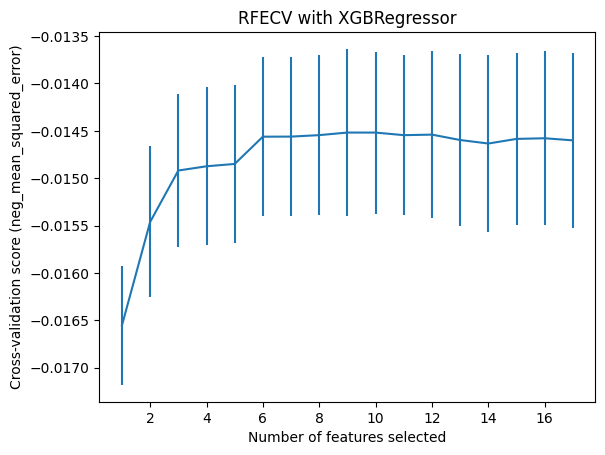

In [51]:
from sklearn.model_selection import train_test_split
X_ = pd.concat([mvbc_data, scada_data], axis=1)
#only keep columns of X with 90% or more non-nan values
X_ = X_.loc[:, X_.isna().sum()/len(X_) < 0.1]

y_ = SS2_dbscan['mean_frequency']
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Xy = pd.DataFrame(y_)
for col in X_.columns:
    Xy[col] = X_[col]
Xy = Xy.dropna()
y = Xy[y_.name]
X = Xy[X_.columns]

y_unique = y_[~y_.index.duplicated(keep='first')].dropna()
print('Availability: ', len(y_unique)/len(X_))

from xgboost import XGBRegressor
from sklearn.feature_selection import RFE, RFECV
from sklearn.model_selection import train_test_split, KFold

regr_model = XGBRegressor()
cv = KFold(10)
selector = RFECV(
    regr_model,
    step=1,
    cv=cv,
    scoring="neg_mean_absolute_error",
    min_features_to_select=1,
    n_jobs=2,
)
selector = selector.fit(X, y)

selected_features = selector.support_
ranking = selector.ranking_

print("Selected features:", X.columns[selected_features])
print("Removed features: ", X.columns[~selected_features])
print("Feature ranking:", ranking)
print('ordered features: ', X.columns[ranking.argsort()])

import matplotlib.pyplot as plt

# Assuming 'selector' is your RFECV object
n_scores = len(selector.cv_results_["mean_test_score"])
min_features_to_select = 1  # as defined in your RFECV setup

plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross-validation score (neg_mean_squared_error)")
plt.errorbar(
    range(min_features_to_select, n_scores + min_features_to_select),
    selector.cv_results_["mean_test_score"],
    yerr=selector.cv_results_["std_test_score"] if 'std_test_score' in selector.cv_results_ else None
)
plt.title("RFECV with XGBRegressor")
plt.show()

In [52]:
from sklearn.model_selection import train_test_split
X_ = pd.concat([mvbc_data, scada_data], axis=1)
#only keep columns of X with 90% or more non-nan values
X_ = X_.loc[:, X_.isna().sum()/len(X_) < 0.1]

y_ = SS1_dbscan['mean_frequency']
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Xy = pd.DataFrame(y_)
for col in X_.columns:
    Xy[col] = X_[col]
Xy = Xy.dropna()
y = Xy[y_.name]
X = Xy[X_.columns]

y_unique = y_[~y_.index.duplicated(keep='first')].dropna()
print('Availability: ', len(y_unique)/len(X_))

from xgboost import XGBRegressor
from sklearn.feature_selection import RFE, RFECV
from sklearn.model_selection import train_test_split, KFold

regr_model = XGBRegressor()
cv = KFold(10)
selector = RFECV(
    regr_model,
    step=1,
    cv=cv,
    scoring="neg_mean_absolute_error",
    min_features_to_select=1,
    n_jobs=2,
)
selector = selector.fit(X, y)

selected_features = selector.support_
ranking = selector.ranking_

print("Selected features:", X.columns[selected_features])
print("Removed features: ", X.columns[~selected_features])
print("Feature ranking:", ranking)
print('ordered features: ', X.columns[ranking.argsort()])

Availability:  0.8653527632998526
Selected features: Index(['mean_NW2_C02_pitch', 'mean_NW2_C02_windspeed'], dtype='object')
Removed features:  Index(['mvbc_WandelaarBuoy_10%_highest_waves',
       'mvbc_WandelaarBuoy_Wave_height',
       'mvbc_WandelaarBuoy_Average_wave_period',
       'mvbc_WandelaarBuoy_Height_waves_with_period_>_10_s',
       'mvbc_WandelaarBuoy_Sea_water_temperature',
       'mvbc_WandelaarMeasuringpile_Max_3-seconds_wind_gust_(at_10_m_height)',
       'mvbc_WandelaarMeasuringpile_Average_wind_direction',
       'mvbc_WandelaarMeasuringpile_Average_wind_speed_(at_10_m_height)',
       'mvbc_WandelaarMeasuringpile_Tide_TAW',
       'mvbc_WandelaarMeasuringpile_Air_pressure',
       'mvbc_WandelaarMeasuringpile_Air_temperature', 'mean_NW2_C02_rpm',
       'mean_NW2_C02_yaw', 'mean_NW2_C02_power', 'mean_NW2_C02_winddirection'],
      dtype='object')
Feature ranking: [ 4 11  6 13 10 16 14 15 12  8  3  2  9  1  5  1  7]
ordered features:  Index(['mean_NW2_C02_pitch', '

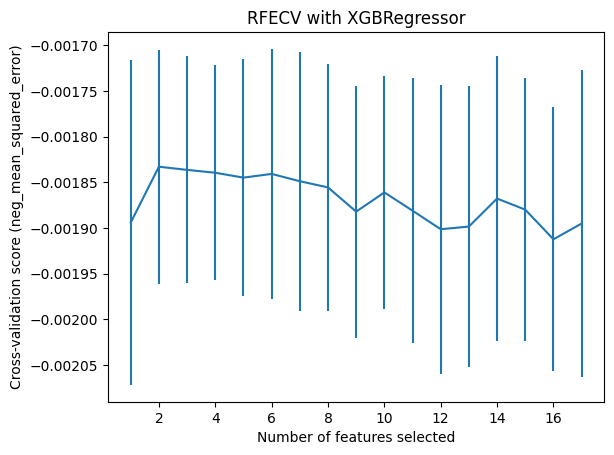

In [53]:
import matplotlib.pyplot as plt

# Assuming 'selector' is your RFECV object
n_scores = len(selector.cv_results_["mean_test_score"])
min_features_to_select = 1  # as defined in your RFECV setup

plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross-validation score (neg_mean_squared_error)")
plt.errorbar(
    range(min_features_to_select, n_scores + min_features_to_select),
    selector.cv_results_["mean_test_score"],
    yerr=selector.cv_results_["std_test_score"] if 'std_test_score' in selector.cv_results_ else None
)
plt.title("RFECV with XGBRegressor")
plt.show()


# With R2

Availability:  0.9184458052849914
Selected features: Index(['mvbc_WandelaarBuoy_10%_highest_waves',
       'mvbc_WandelaarBuoy_Wave_height',
       'mvbc_WandelaarMeasuringpile_Tide_TAW', 'mean_NW2_C02_rpm',
       'mean_NW2_C02_pitch', 'mean_NW2_C02_power', 'mean_NW2_C02_windspeed'],
      dtype='object')
Removed features:  Index(['mvbc_WandelaarBuoy_Average_wave_period',
       'mvbc_WandelaarBuoy_Height_waves_with_period_>_10_s',
       'mvbc_WandelaarBuoy_Sea_water_temperature',
       'mvbc_WandelaarMeasuringpile_Max_3-seconds_wind_gust_(at_10_m_height)',
       'mvbc_WandelaarMeasuringpile_Average_wind_direction',
       'mvbc_WandelaarMeasuringpile_Average_wind_speed_(at_10_m_height)',
       'mvbc_WandelaarMeasuringpile_Air_pressure',
       'mvbc_WandelaarMeasuringpile_Air_temperature', 'mean_NW2_C02_yaw',
       'mean_NW2_C02_winddirection'],
      dtype='object')
Feature ranking: [ 1  1  7 11  5 10  9  8  1  6  3  1  4  1  1  1  2]
ordered features:  Index(['mvbc_WandelaarBu

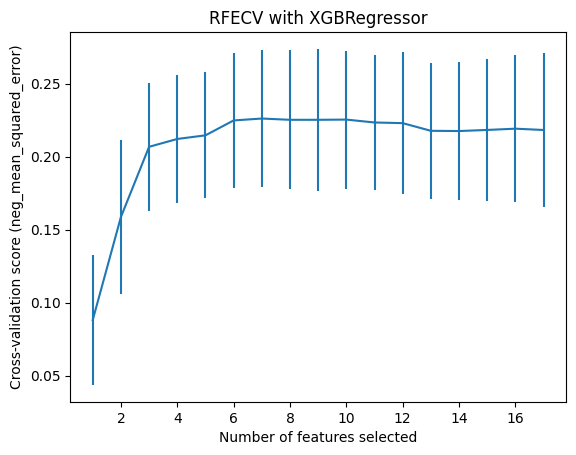

In [54]:
from sklearn.model_selection import train_test_split
X_ = pd.concat([mvbc_data, scada_data], axis=1)
#only keep columns of X with 90% or more non-nan values
X_ = X_.loc[:, X_.isna().sum()/len(X_) < 0.1]

y_ = SS2_dbscan['mean_frequency']
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Xy = pd.DataFrame(y_)
for col in X_.columns:
    Xy[col] = X_[col]
Xy = Xy.dropna()
y = Xy[y_.name]
X = Xy[X_.columns]

y_unique = y_[~y_.index.duplicated(keep='first')].dropna()
print('Availability: ', len(y_unique)/len(X_))

from xgboost import XGBRegressor
from sklearn.feature_selection import RFE, RFECV
from sklearn.model_selection import train_test_split, KFold

regr_model = XGBRegressor()
cv = KFold(10)
selector = RFECV(
    regr_model,
    step=1,
    cv=cv,
    scoring="r2",
    min_features_to_select=1,
    n_jobs=2,
)
selector = selector.fit(X, y)

selected_features = selector.support_
ranking = selector.ranking_

print("Selected features:", X.columns[selected_features])
print("Removed features: ", X.columns[~selected_features])
print("Feature ranking:", ranking)
print('ordered features: ', X.columns[ranking.argsort()])

import matplotlib.pyplot as plt

# Assuming 'selector' is your RFECV object
n_scores = len(selector.cv_results_["mean_test_score"])
min_features_to_select = 1  # as defined in your RFECV setup

plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross-validation score (neg_mean_squared_error)")
plt.errorbar(
    range(min_features_to_select, n_scores + min_features_to_select),
    selector.cv_results_["mean_test_score"],
    yerr=selector.cv_results_["std_test_score"] if 'std_test_score' in selector.cv_results_ else None
)
plt.title("RFECV with XGBRegressor")
plt.show()

Availability:  0.8653527632998526
Selected features: Index(['mean_NW2_C02_pitch', 'mean_NW2_C02_windspeed'], dtype='object')
Removed features:  Index(['mvbc_WandelaarBuoy_10%_highest_waves',
       'mvbc_WandelaarBuoy_Wave_height',
       'mvbc_WandelaarBuoy_Average_wave_period',
       'mvbc_WandelaarBuoy_Height_waves_with_period_>_10_s',
       'mvbc_WandelaarBuoy_Sea_water_temperature',
       'mvbc_WandelaarMeasuringpile_Max_3-seconds_wind_gust_(at_10_m_height)',
       'mvbc_WandelaarMeasuringpile_Average_wind_direction',
       'mvbc_WandelaarMeasuringpile_Average_wind_speed_(at_10_m_height)',
       'mvbc_WandelaarMeasuringpile_Tide_TAW',
       'mvbc_WandelaarMeasuringpile_Air_pressure',
       'mvbc_WandelaarMeasuringpile_Air_temperature', 'mean_NW2_C02_rpm',
       'mean_NW2_C02_yaw', 'mean_NW2_C02_power', 'mean_NW2_C02_winddirection'],
      dtype='object')
Feature ranking: [ 4 11  6 13 10 16 14 15 12  8  3  2  9  1  5  1  7]
ordered features:  Index(['mean_NW2_C02_pitch', '

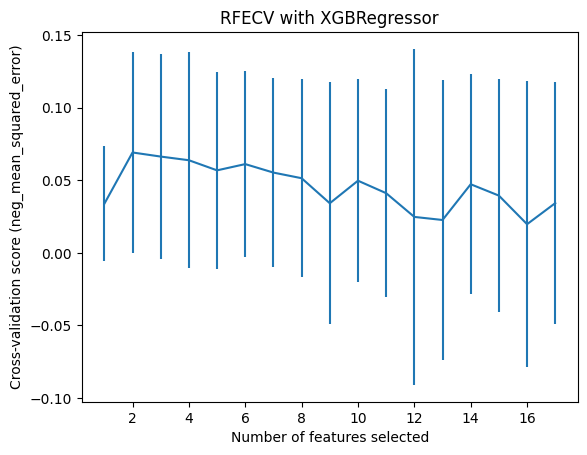

In [55]:
from sklearn.model_selection import train_test_split
X_ = pd.concat([mvbc_data, scada_data], axis=1)
#only keep columns of X with 90% or more non-nan values
X_ = X_.loc[:, X_.isna().sum()/len(X_) < 0.1]

y_ = SS1_dbscan['mean_frequency']
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Xy = pd.DataFrame(y_)
for col in X_.columns:
    Xy[col] = X_[col]
Xy = Xy.dropna()
y = Xy[y_.name]
X = Xy[X_.columns]

y_unique = y_[~y_.index.duplicated(keep='first')].dropna()
print('Availability: ', len(y_unique)/len(X_))

from xgboost import XGBRegressor
from sklearn.feature_selection import RFE, RFECV
from sklearn.model_selection import train_test_split, KFold

regr_model = XGBRegressor()
cv = KFold(10)
selector = RFECV(
    regr_model,
    step=1,
    cv=cv,
    scoring="r2",
    min_features_to_select=1,
    n_jobs=2,
)
selector = selector.fit(X, y)

selected_features = selector.support_
ranking = selector.ranking_

print("Selected features:", X.columns[selected_features])
print("Removed features: ", X.columns[~selected_features])
print("Feature ranking:", ranking)
print('ordered features: ', X.columns[ranking.argsort()])

import matplotlib.pyplot as plt

# Assuming 'selector' is your RFECV object
n_scores = len(selector.cv_results_["mean_test_score"])
min_features_to_select = 1  # as defined in your RFECV setup

plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross-validation score (neg_mean_squared_error)")
plt.errorbar(
    range(min_features_to_select, n_scores + min_features_to_select),
    selector.cv_results_["mean_test_score"],
    yerr=selector.cv_results_["std_test_score"] if 'std_test_score' in selector.cv_results_ else None
)
plt.title("RFECV with XGBRegressor")
plt.show()

Availability:  0.39233235575681136
Selected features: Index(['mean_NW2_C02_rpm'], dtype='object')
Removed features:  Index(['mvbc_WandelaarBuoy_10%_highest_waves',
       'mvbc_WandelaarBuoy_Wave_height',
       'mvbc_WandelaarBuoy_Average_wave_period',
       'mvbc_WandelaarBuoy_Height_waves_with_period_>_10_s',
       'mvbc_WandelaarBuoy_Sea_water_temperature',
       'mvbc_WandelaarMeasuringpile_Max_3-seconds_wind_gust_(at_10_m_height)',
       'mvbc_WandelaarMeasuringpile_Average_wind_direction',
       'mvbc_WandelaarMeasuringpile_Average_wind_speed_(at_10_m_height)',
       'mvbc_WandelaarMeasuringpile_Tide_TAW',
       'mvbc_WandelaarMeasuringpile_Air_pressure',
       'mvbc_WandelaarMeasuringpile_Air_temperature', 'mean_NW2_C02_yaw',
       'mean_NW2_C02_pitch', 'mean_NW2_C02_power', 'mean_NW2_C02_windspeed',
       'mean_NW2_C02_winddirection'],
      dtype='object')
Feature ranking: [17 16 13 15 12 11 14 10  9  8  6  1  3  2  7  4  5]
ordered features:  Index(['mean_NW2_C02_r

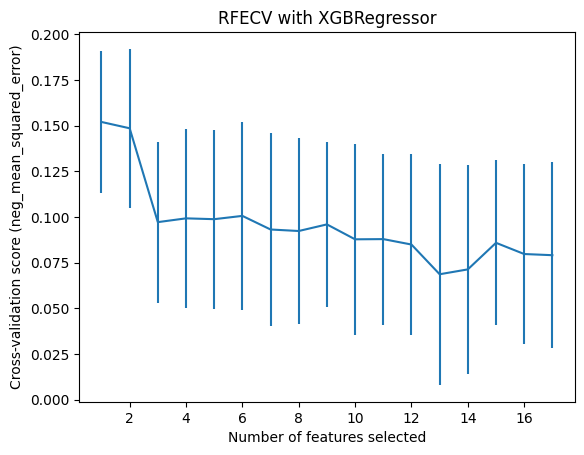

In [56]:
from sklearn.model_selection import train_test_split
X_ = pd.concat([mvbc_data, scada_data], axis=1)
#only keep columns of X with 90% or more non-nan values
X_ = X_.loc[:, X_.isna().sum()/len(X_) < 0.1]

y_ = FA1_dbscan['mean_frequency']
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Xy = pd.DataFrame(y_)
for col in X_.columns:
    Xy[col] = X_[col]
Xy = Xy.dropna()
y = Xy[y_.name]
X = Xy[X_.columns]

y_unique = y_[~y_.index.duplicated(keep='first')].dropna()
print('Availability: ', len(y_unique)/len(X_))

from xgboost import XGBRegressor
from sklearn.feature_selection import RFE, RFECV
from sklearn.model_selection import train_test_split, KFold

regr_model = XGBRegressor()
cv = KFold(10)
selector = RFECV(
    regr_model,
    step=1,
    cv=cv,
    scoring="r2",
    min_features_to_select=1,
    n_jobs=2,
)
selector = selector.fit(X, y)

selected_features = selector.support_
ranking = selector.ranking_

print("Selected features:", X.columns[selected_features])
print("Removed features: ", X.columns[~selected_features])
print("Feature ranking:", ranking)
print('ordered features: ', X.columns[ranking.argsort()])

import matplotlib.pyplot as plt

# Assuming 'selector' is your RFECV object
n_scores = len(selector.cv_results_["mean_test_score"])
min_features_to_select = 1  # as defined in your RFECV setup

plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross-validation score (neg_mean_squared_error)")
plt.errorbar(
    range(min_features_to_select, n_scores + min_features_to_select),
    selector.cv_results_["mean_test_score"],
    yerr=selector.cv_results_["std_test_score"] if 'std_test_score' in selector.cv_results_ else None
)
plt.title("RFECV with XGBRegressor")
plt.show()

Availability:  0.07397164521569997
Selected features: Index(['mvbc_WandelaarBuoy_10%_highest_waves',
       'mvbc_WandelaarBuoy_Wave_height',
       'mvbc_WandelaarBuoy_Sea_water_temperature',
       'mvbc_WandelaarMeasuringpile_Tide_TAW',
       'mvbc_WandelaarMeasuringpile_Air_pressure',
       'mvbc_WandelaarMeasuringpile_Air_temperature', 'mean_NW2_C02_rpm',
       'mean_NW2_C02_yaw', 'mean_NW2_C02_pitch', 'mean_NW2_C02_power',
       'mean_NW2_C02_windspeed', 'mean_NW2_C02_winddirection'],
      dtype='object')
Removed features:  Index(['mvbc_WandelaarBuoy_Average_wave_period',
       'mvbc_WandelaarBuoy_Height_waves_with_period_>_10_s',
       'mvbc_WandelaarMeasuringpile_Max_3-seconds_wind_gust_(at_10_m_height)',
       'mvbc_WandelaarMeasuringpile_Average_wind_direction',
       'mvbc_WandelaarMeasuringpile_Average_wind_speed_(at_10_m_height)'],
      dtype='object')
Feature ranking: [1 1 3 5 1 6 2 4 1 1 1 1 1 1 1 1 1]
ordered features:  Index(['mvbc_WandelaarBuoy_10%_highest_w

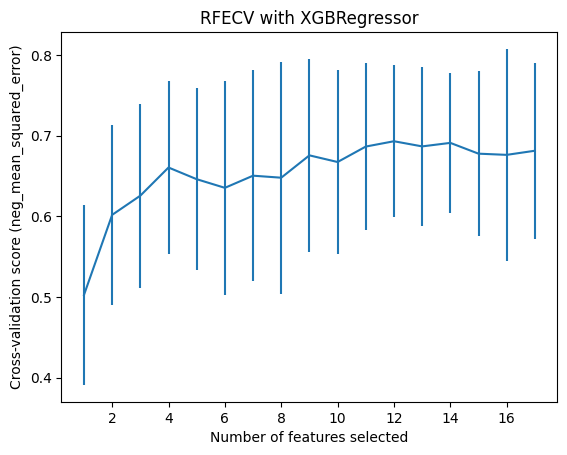

In [57]:
from sklearn.model_selection import train_test_split
X_ = pd.concat([mvbc_data, scada_data], axis=1)
#only keep columns of X with 90% or more non-nan values
X_ = X_.loc[:, X_.isna().sum()/len(X_) < 0.1]


ss2_selected.set_index('timestamp', inplace=True)
ss2_selected.index = pd.to_datetime(ss2_selected.index, utc=True)

y_ = ss2_selected['mean_frequency']
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Xy = pd.DataFrame(y_)
for col in X_.columns:
    Xy[col] = X_[col]
Xy = Xy.dropna()
y = Xy[y_.name]
X = Xy[X_.columns]

y_unique = y_[~y_.index.duplicated(keep='first')].dropna()
print('Availability: ', len(y_unique)/len(X_))

from xgboost import XGBRegressor
from sklearn.feature_selection import RFE, RFECV
from sklearn.model_selection import train_test_split, KFold

regr_model = XGBRegressor()
cv = KFold(10)
selector = RFECV(
    regr_model,
    step=1,
    cv=cv,
    scoring="r2",
    min_features_to_select=1,
    n_jobs=2,
)
selector = selector.fit(X, y)

selected_features = selector.support_
ranking = selector.ranking_

print("Selected features:", X.columns[selected_features])
print("Removed features: ", X.columns[~selected_features])
print("Feature ranking:", ranking)
print('ordered features: ', X.columns[ranking.argsort()])

import matplotlib.pyplot as plt

# Assuming 'selector' is your RFECV object
n_scores = len(selector.cv_results_["mean_test_score"])
min_features_to_select = 1  # as defined in your RFECV setup

plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross-validation score (neg_mean_squared_error)")
plt.errorbar(
    range(min_features_to_select, n_scores + min_features_to_select),
    selector.cv_results_["mean_test_score"],
    yerr=selector.cv_results_["std_test_score"] if 'std_test_score' in selector.cv_results_ else None
)
plt.title("RFECV with XGBRegressor")
plt.show()

Availability:  0.07397164521569997
Selected features: Index(['mvbc_WandelaarBuoy_10%_highest_waves',
       'mvbc_WandelaarBuoy_Wave_height',
       'mvbc_WandelaarBuoy_Sea_water_temperature',
       'mvbc_WandelaarMeasuringpile_Tide_TAW',
       'mvbc_WandelaarMeasuringpile_Air_pressure',
       'mvbc_WandelaarMeasuringpile_Air_temperature', 'mean_NW2_C02_rpm',
       'mean_NW2_C02_yaw', 'mean_NW2_C02_pitch', 'mean_NW2_C02_power',
       'mean_NW2_C02_windspeed', 'mean_NW2_C02_winddirection'],
      dtype='object')
Removed features:  Index(['mvbc_WandelaarBuoy_Average_wave_period',
       'mvbc_WandelaarBuoy_Height_waves_with_period_>_10_s',
       'mvbc_WandelaarMeasuringpile_Max_3-seconds_wind_gust_(at_10_m_height)',
       'mvbc_WandelaarMeasuringpile_Average_wind_direction',
       'mvbc_WandelaarMeasuringpile_Average_wind_speed_(at_10_m_height)'],
      dtype='object')
Feature ranking: [1 1 3 5 1 6 2 4 1 1 1 1 1 1 1 1 1]
ordered features:  Index(['mvbc_WandelaarBuoy_10%_highest_w

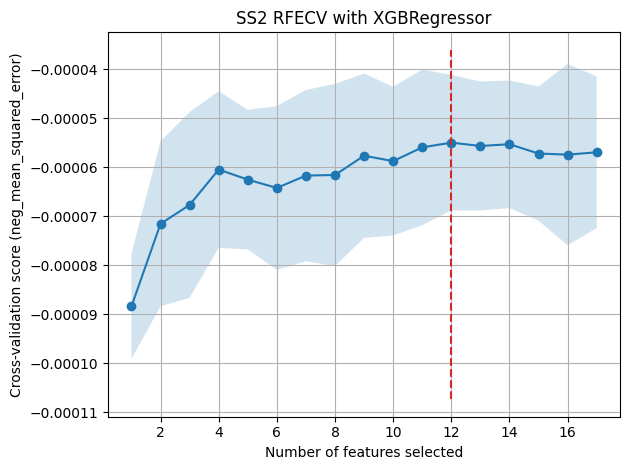

In [58]:
from sklearn.model_selection import train_test_split
X_ = pd.concat([mvbc_data, scada_data], axis=1)
#only keep columns of X with 90% or more non-nan values
X_ = X_.loc[:, X_.isna().sum()/len(X_) < 0.1]


#ss2_selected.set_index('timestamp', inplace=True)
#ss2_selected.index = pd.to_datetime(ss2_selected.index, utc=True)

y_ = ss2_selected['mean_frequency']
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Xy = pd.DataFrame(y_)
for col in X_.columns:
    Xy[col] = X_[col]
Xy = Xy.dropna()
y = Xy[y_.name]
X = Xy[X_.columns]

y_unique = y_[~y_.index.duplicated(keep='first')].dropna()
print('Availability: ', len(y_unique)/len(X_))

from xgboost import XGBRegressor
from sklearn.feature_selection import RFE, RFECV
from sklearn.model_selection import train_test_split, KFold

regr_model = XGBRegressor()
cv = KFold(10)
selector = RFECV(
    regr_model,
    step=1,
    cv=cv,
    scoring="neg_mean_squared_error",
    min_features_to_select=1,
    n_jobs=2,
)
selector = selector.fit(X, y)

selected_features = selector.support_
ranking = selector.ranking_

print("Selected features:", X.columns[selected_features])
print("Removed features: ", X.columns[~selected_features])
print("Feature ranking:", ranking)
print('ordered features: ', X.columns[ranking.argsort()])

import matplotlib.pyplot as plt
import numpy as np
# Assuming 'selector' is your RFECV object
n_scores = len(selector.cv_results_["mean_test_score"])
min_features_to_select = 1  # as defined in your RFECV setup

plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross-validation score (neg_mean_squared_error)")
plt.plot(range(min_features_to_select, n_scores + min_features_to_select),
    selector.cv_results_["mean_test_score"],
    color='tab:blue',
    marker = 'o'
)
plt.fill_between(range(min_features_to_select, n_scores + min_features_to_select),
    selector.cv_results_["mean_test_score"] - selector.cv_results_["std_test_score"],
    selector.cv_results_["mean_test_score"] + selector.cv_results_["std_test_score"], alpha=0.2)
# plt.errorbar(
#     range(min_features_to_select, n_scores + min_features_to_select),
#     selector.cv_results_["mean_test_score"],
#     yerr=selector.cv_results_["std_test_score"] if 'std_test_score' in selector.cv_results_ else None,
#     color='tab:blue'
# )
plt.vlines(selector.n_features_,
           ymin=selector.cv_results_['mean_test_score'].min() - selector.cv_results_["std_test_score"].max(),
           ymax=selector.cv_results_['mean_test_score'].max() + selector.cv_results_["std_test_score"].max(),
           color='tab:red', linestyle='--')
plt.grid()
plt.title("SS2 RFECV with XGBRegressor")
plt.tight_layout()
#plt.yticks(np.linspace(-4e-5, -11e-5, 8), [''.format(x) for x in np.linspace(-4e-5, -11e-5, 8)])
plt.show()

Availability:  0.8653527632998526
Selected features: Index(['mean_NW2_C02_pitch', 'mean_NW2_C02_windspeed'], dtype='object')
Removed features:  Index(['mvbc_WandelaarBuoy_10%_highest_waves',
       'mvbc_WandelaarBuoy_Wave_height',
       'mvbc_WandelaarBuoy_Average_wave_period',
       'mvbc_WandelaarBuoy_Height_waves_with_period_>_10_s',
       'mvbc_WandelaarBuoy_Sea_water_temperature',
       'mvbc_WandelaarMeasuringpile_Max_3-seconds_wind_gust_(at_10_m_height)',
       'mvbc_WandelaarMeasuringpile_Average_wind_direction',
       'mvbc_WandelaarMeasuringpile_Average_wind_speed_(at_10_m_height)',
       'mvbc_WandelaarMeasuringpile_Tide_TAW',
       'mvbc_WandelaarMeasuringpile_Air_pressure',
       'mvbc_WandelaarMeasuringpile_Air_temperature', 'mean_NW2_C02_rpm',
       'mean_NW2_C02_yaw', 'mean_NW2_C02_power', 'mean_NW2_C02_winddirection'],
      dtype='object')
Feature ranking: [ 4 11  6 13 10 16 14 15 12  8  3  2  9  1  5  1  7]
ordered features:  Index(['mean_NW2_C02_pitch', '

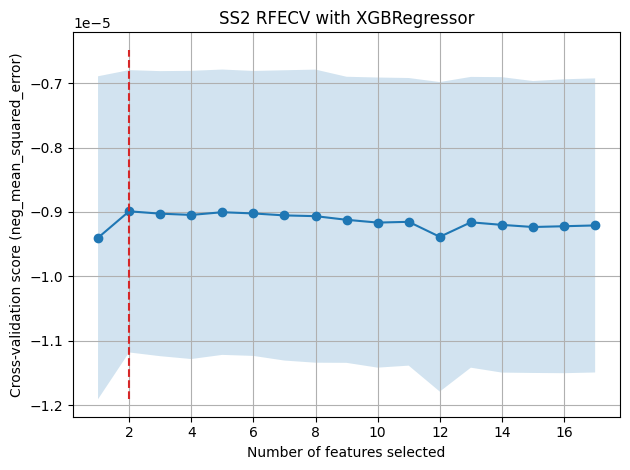

In [59]:
from sklearn.model_selection import train_test_split
X_ = pd.concat([mvbc_data, scada_data], axis=1)
#only keep columns of X with 90% or more non-nan values
X_ = X_.loc[:, X_.isna().sum()/len(X_) < 0.1]


#ss2_selected.set_index('timestamp', inplace=True)
#ss2_selected.index = pd.to_datetime(ss2_selected.index, utc=True)

y_ = SS1_dbscan['mean_frequency']
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Xy = pd.DataFrame(y_)
for col in X_.columns:
    Xy[col] = X_[col]
Xy = Xy.dropna()
y = Xy[y_.name]
X = Xy[X_.columns]

y_unique = y_[~y_.index.duplicated(keep='first')].dropna()
print('Availability: ', len(y_unique)/len(X_))

from xgboost import XGBRegressor
from sklearn.feature_selection import RFE, RFECV
from sklearn.model_selection import train_test_split, KFold

regr_model = XGBRegressor()
cv = KFold(20)
selector = RFECV(
    regr_model,
    step=1,
    cv=cv,
    scoring="neg_mean_squared_error",
    min_features_to_select=1,
    n_jobs=2,
)
selector = selector.fit(X, y)

selected_features = selector.support_
ranking = selector.ranking_

print("Selected features:", X.columns[selected_features])
print("Removed features: ", X.columns[~selected_features])
print("Feature ranking:", ranking)
print('ordered features: ', X.columns[ranking.argsort()])

import matplotlib.pyplot as plt
import numpy as np
# Assuming 'selector' is your RFECV object
n_scores = len(selector.cv_results_["mean_test_score"])
min_features_to_select = 1  # as defined in your RFECV setup

plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross-validation score (neg_mean_squared_error)")
plt.plot(range(min_features_to_select, n_scores + min_features_to_select),
    selector.cv_results_["mean_test_score"],
    color='tab:blue',
    marker = 'o'
)
plt.fill_between(range(min_features_to_select, n_scores + min_features_to_select),
    selector.cv_results_["mean_test_score"] - selector.cv_results_["std_test_score"],
    selector.cv_results_["mean_test_score"] + selector.cv_results_["std_test_score"], alpha=0.2)
# plt.errorbar(
#     range(min_features_to_select, n_scores + min_features_to_select),
#     selector.cv_results_["mean_test_score"],
#     yerr=selector.cv_results_["std_test_score"] if 'std_test_score' in selector.cv_results_ else None,
#     color='tab:blue'
# )
plt.vlines(selector.n_features_,
           ymin=selector.cv_results_['mean_test_score'].min() - selector.cv_results_["std_test_score"].max(),
           ymax=selector.cv_results_['mean_test_score'].max() + selector.cv_results_["std_test_score"].max(),
           color='tab:red', linestyle='--')
plt.grid()
plt.title("SS2 RFECV with XGBRegressor")
plt.tight_layout()
#plt.yticks(np.linspace(-4e-5, -11e-5, 8), [''.format(x) for x in np.linspace(-4e-5, -11e-5, 8)])
plt.show()

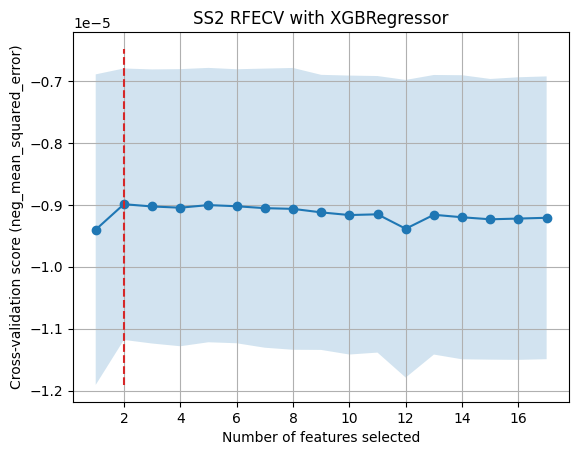

In [60]:
import numpy as np
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross-validation score (neg_mean_squared_error)")
plt.plot(range(min_features_to_select, n_scores + min_features_to_select),
    selector.cv_results_["mean_test_score"],
    color='tab:blue',
    marker = 'o'
)
plt.fill_between(range(min_features_to_select, n_scores + min_features_to_select),
    selector.cv_results_["mean_test_score"] - selector.cv_results_["std_test_score"],
    selector.cv_results_["mean_test_score"] + selector.cv_results_["std_test_score"], alpha=0.2)
# plt.errorbar(
#     range(min_features_to_select, n_scores + min_features_to_select),
#     selector.cv_results_["mean_test_score"],
#     yerr=selector.cv_results_["std_test_score"] if 'std_test_score' in selector.cv_results_ else None,
#     color='tab:blue'
# )
plt.vlines(selector.n_features_,
           ymin=selector.cv_results_['mean_test_score'].min() - selector.cv_results_["std_test_score"].max(),
           ymax=selector.cv_results_['mean_test_score'].max() + selector.cv_results_["std_test_score"].max(),
           color='tab:red', linestyle='--')
plt.grid()
plt.title("SS2 RFECV with XGBRegressor")
#plt.tight_layout()
plt.show()